### figure 2 - sex-specific heritability and genetic correlation of biomarkers and other traits

In [1]:
# load packages and dependencies
require('tidyverse')
require('reshape2')  # for dcast 

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [3]:
# read in all the ss biomarker data
BIOMARKER.DIR <- "../../data/1015/m1/"
biomarker_traits <- list.files(BIOMARKER.DIR, pattern="f_\\D*.RData")

biomarkers <- sapply(biomarker_traits, function(x) strsplit(strsplit(x, "f_",fixed=TRUE)[[1]][[2]], ".RData")[[1]][[1]])

biomarkers2 <- setdiff(biomarkers , c("arm_fp", "leg_fp", "trunk_fp", "whr"))
biomarkers2
length(biomarkers2) # 35 biomarkers

# column names depend on the dimension
# t(c(trait, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), unlist(rg), unlist(rg.c$l), unlist(rg.c$u), unlist(h)))
# rg.l and rg.u are the 95% CI for rg
m1.cols <-  c("trait", "n", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg", "rg.l", "rg.u", "h.f", "h.m")

biomarker_df <- do.call(rbind, lapply(biomarkers2, function(x) read.table(sprintf("%s/summary_dat_%s_2_.txt", BIOMARKER.DIR, x), sep=" ", header=TRUE)))
colnames(biomarker_df) <- m1.cols
head(biomarker_df)
    


[1] "Alanine_aminotransferase"   "Albumin"                   
 [3] "Aspartate_aminotransferase" "C_reactive_protein"        
 [5] "Calcium"                    "Cholesterol.adjust.statins"
 [7] "Cholesterol"                "Creatinine"                
 [9] "Cystatin_C"                 "eGFR"                      
[11] "Gamma_glutamyltransferase"  "Microalbumin_in_urine"     
[13] "Non_albumin_protein"        "Phosphate"                 
[15] "Rheumatoid_factor"          "Testosterone"              
[17] "Total_protein"              "Urate"                     
[19] "Urea"                       "Vitamin_D"

[1] 20

trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
Alanine_aminotransferase,185830,0.9278233,0.07217668,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448,NA,NA
Albumin,185176,0.8741166,0.12588342,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145,NA,NA
Aspartate_aminotransferase,185808,0.9434305,0.05656945,1.297883e-04,1.244600e-04,1.244600e-04,1.263416e-04,0.9720029,0.9595379,0.9840022,NA,NA
C_reactive_protein,185819,0.9875002,0.01249977,1.202204e-03,1.035962e-03,1.035962e-03,9.362312e-04,0.9764974,0.9707469,0.9811589,NA,NA
Calcium,185170,0.9228879,0.07711207,6.103708e-05,6.152176e-05,6.152176e-05,6.560173e-05,0.9723815,0.9508241,0.9911112,NA,NA
Cholesterol.adjust.statins,5914,0.9411573,0.05884271,4.050831e-05,3.942085e-05,3.942085e-05,6.169585e-05,0.7971925,0.5961505,0.9581857,NA,NA


In [68]:
# read in all the other trait data
ALT.DIR <- "../../data/1009/"

summary_files <- list.files(ALT.DIR, pattern="summary_(\\w)*_2_.txt")
alt_traits <- str_replace_all(summary_files, c("summary_dat_"="", "_2_.txt" =""))

alt_df <- do.call(rbind, lapply(summary_files, function(x) read.table(sprintf("%s/%s", ALT.DIR, x), sep=" ", header=TRUE)))
colnames(alt_df) <- m1.cols
head(alt_df)
    

# read in all the error bars now
    
alt_err <- do.call(rbind, lapply(alt_traits, function(trait) read_tsv(sprintf("%sh_err_%s_2_.txt", ALT.DIR, trait))))


trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
arm_fp,183550,0.5781458,0.4218542,2.186498e-05,6.072976e-06,6.072976e-06,1.179050e-05,0.3782698,0.3488308,0.4064221,0.2603190,0.1727109
FEV_FVC,181293,0.8525613,0.1474387,3.504840e+06,-1.561816e+01,-1.561816e+01,6.703808e+02,0.1906889,-0.7955964,0.9393048,NaN,NaN
INI20015,183883,0.7177631,0.2822369,5.853551e-05,5.880110e-05,5.880110e-05,6.192723e-05,0.9766783,0.9670898,0.9854629,0.2494337,0.2555497
INI20021,99105,0.7705029,0.2294971,1.292828e-02,7.224052e-04,7.224052e-04,1.017964e-01,0.1650509,-0.5095128,0.7892614,0.1431773,0.6892277
INI20022,178885,0.7979287,0.2020713,2.291604e-05,1.964722e-05,1.964722e-05,1.985772e-05,0.9217529,0.8577045,0.9783293,0.1467711,0.1014030
INI20150,183206,0.6558704,0.3441296,2.213115e-05,2.135129e-05,2.135129e-05,2.189049e-05,0.9701867,0.9478763,0.9887214,0.2017964,0.1946574


Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column s

Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_integer(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column s

In [69]:
# fix the fact that the traits have numbers instead of values in the table
alt_err2 <- alt_err %>% 
   mutate(trait=ifelse(trait %in% alt_traits, trait, alt_traits[as.numeric(trait)]))


In [4]:

# need to read in a key and change the codes
phe_codes <- read_csv("../../data/ListPheCodes.csv")
head(phe_codes)
phe_codes <- phe_codes %>% 
mutate(variable_name=str_replace_all(variable_name, " ", "_")) %>%
mutate(trait=str_replace(trait, "INI", ""))
phe_codes %>% filter(variable_name=="Testosterone")

Parsed with column specification:
cols(
  trait = col_character(),
  category = col_character(),
  variable_name = col_character(),
  readable_name = col_character()
)


trait,category,variable_name,readable_name
3140,sex specific,pregnant,pregnant
2724,sex specific,menopause,menopause
3581,sex specific,menopause_age,age menopause
3591,sex specific,hysterectomy,hysterectomy
2934,sex specific,oophorectomy,oophorectomy
3700,sex specific,time_since_period,time since last menstrual period


trait,category,variable_name,readable_name
30850,biomarker,Testosterone,NA


In [71]:
alt_df <- alt_df %>% mutate(trait=str_replace(trait,"INI", ""))
alt_err2 <- alt_err2 %>% mutate(trait=str_replace(trait,"INI", ""))


In [5]:
phe_codes$trait

[1] "3140"     "2724"     "3581"     "3591"     "2934"     "3700"    
  [7] "3710"     "3720"     "2804"     "3546"     "2178"     "2188"    
 [13] "whr"      "21001"    "50"       "48"       "49"       "4079"    
 [19] "4080"     "20150"    "3063"     "3064"     "FEV_FVC"  "23100"   
 [25] "23116"    "23112"    "23124"    "23120"    "23128"    "23099"   
 [31] "23105"    "23115"    "23111"    "23123"    "23119"    "23127"   
 [37] "23100"    "23101"    "23102"    "23106"    "23107"    "23108"   
 [43] "23109"    "23110"    "trunk_fp" "leg_fp"   "arm_fp"   "46"      
 [49] "47"       "20015"    "20019"    "20021"    "20022"    "20150"   
 [55] "20151"    "21021"    "30000"    "30010"    "30020"    "30030"   
 [61] "30040"    "30050"    "30060"    "30070"    "30080"    "30090"   
 [67] "30100"    "30110"    "30120"    "30130"    "30140"    "30150"   
 [73] "30160"    "30170"    "30180"    "30190"    "30200"    "30210"   
 [79] "30220"    "30230"    "30240"    "30250"    "30260"    "30270"   
 [85] "30280"    "30290"    "30300"    "30500"    "30510"    "30520"   
 [91] "30530"    "30620"    "30600"    "30610"    "30630"    "30640"   
 [97] "30650"    "30710"    "30680"    "30690"    "30700"    "30720"   
[103] "30660"    "30730"    "30740"    "30750"    "30760"    "30770"   
[109] "30780"    "30790"    "30800"    "30810"    "30820"    "30830"   
[115] "30850"    "30840"    "30860"    "30870"    "30880"    "30670"   
[121] "30890"    "30510"

In [73]:
alt_df2 <- right_join(phe_codes %>% select(trait, category, variable_name), alt_df) %>% select(-h.f, -h.m) 
alt_err2 <- right_join(phe_codes %>% select(trait, category, variable_name), alt_err2)
head(alt_err2)
head(alt_df2)

Joining, by = "trait"
Joining, by = "trait"


trait,category,variable_name,int,sex,value
arm_fp,fat distribution,arm_fat_ratio,up,hf,0.2586310
arm_fp,fat distribution,arm_fat_ratio,low,hf,0.2578651
arm_fp,fat distribution,arm_fat_ratio,center,hf,0.2592817
arm_fp,fat distribution,arm_fat_ratio,up,hm,0.1742181
arm_fp,fat distribution,arm_fat_ratio,low,hm,0.1705815
arm_fp,fat distribution,arm_fat_ratio,center,hm,0.1775808


trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u
arm_fp,fat distribution,arm_fat_ratio,183550,0.5781458,0.4218542,2.186498e-05,6.072976e-06,6.072976e-06,1.179050e-05,0.3782698,0.3488308,0.4064221
FEV_FVC,breathing,FEV_FVC,181293,0.8525613,0.1474387,3.504840e+06,-1.561816e+01,-1.561816e+01,6.703808e+02,0.1906889,-0.7955964,0.9393048
20015,anthropometric traits,Sitting_height,183883,0.7177631,0.2822369,5.853551e-05,5.880110e-05,5.880110e-05,6.192723e-05,0.9766783,0.9670898,0.9854629
20021,hearing test,Speech-reception-threshold_(SRT)_estimate_(right),99105,0.7705029,0.2294971,1.292828e-02,7.224052e-04,7.224052e-04,1.017964e-01,0.1650509,-0.5095128,0.7892614
20022,anthropometric traits,Birth_weight,178885,0.7979287,0.2020713,2.291604e-05,1.964722e-05,1.964722e-05,1.985772e-05,0.9217529,0.8577045,0.9783293
20150,breathing,FEV-1,183206,0.6558704,0.3441296,2.213115e-05,2.135129e-05,2.135129e-05,2.189049e-05,0.9701867,0.9478763,0.9887214


In [6]:
setdiff(as.character(biomarker_df$trait), phe_codes$variable_name)
setdiff(filter(phe_codes, category=="biomarker")$variable_name,as.character(biomarker_df$trait))

## TODO: looks like we're missing hbA1C and IGF-1 <-- go back and redo these!

length(intersect(as.character(biomarker_df$trait), phe_codes$variable_name)) # 32

# added this one: 30510, biomarker, Creatinine_in_urine, NA; fixed CRP

## TODO: what is going on w "Fasting_glucose", "eGFR", "Non_albumin_protein" <-- are these derived?
##  these are phenotypes we somehow have but didn't know abt?
##  consider the statin-adjusted too



[1] "Cholesterol.adjust.statins" "eGFR"                      
[3] "Non_albumin_protein"

[1] "Alkaline_phosphatase"         "Apolipoprotein_A"            
 [3] "Apolipoprotein_B"             "Direct_bilirubin"            
 [5] "Glucose"                      "Glycated_haemoglobin_(HbA1c)"
 [7] "HDL_cholesterol"              "IGF-1"                       
 [9] "LDL_direct"                   "Lipoprotein_A"               
[11] "Oestradiol"                   "SHBG"                        
[13] "Total_bilirubin"              "Triglycerides"               
[15] "Creatinine_in_urine"

[1] 17

In [7]:
biomarker_df2 <- right_join(phe_codes %>% select(trait, category, variable_name), 
                            biomarker_df %>% rename(variable_name=trait))  %>%
mutate(category="biomarker", trait=ifelse(is.na(trait), variable_name, trait))  %>% select(-h.f, -h.m) 

head(biomarker_df2)

Joining, by = "variable_name"
Warning message:
“Column `variable_name` joining character vector and factor, coercing into character vector”

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u
30620,biomarker,Alanine_aminotransferase,185830,0.9278233,0.07217668,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448
30600,biomarker,Albumin,185176,0.8741166,0.12588342,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145
30650,biomarker,Aspartate_aminotransferase,185808,0.9434305,0.05656945,1.297883e-04,1.244600e-04,1.244600e-04,1.263416e-04,0.9720029,0.9595379,0.9840022
30710,biomarker,C_reactive_protein,185819,0.9875002,0.01249977,1.202204e-03,1.035962e-03,1.035962e-03,9.362312e-04,0.9764974,0.9707469,0.9811589
30680,biomarker,Calcium,185170,0.9228879,0.07711207,6.103708e-05,6.152176e-05,6.152176e-05,6.560173e-05,0.9723815,0.9508241,0.9911112
Cholesterol.adjust.statins,biomarker,Cholesterol.adjust.statins,5914,0.9411573,0.05884271,4.050831e-05,3.942085e-05,3.942085e-05,6.169585e-05,0.7971925,0.5961505,0.9581857


[1] "h_err_Alanine_aminotransferase_2_.txt"  
 [2] "h_err_Albumin_2_.txt"                   
 [3] "h_err_Aspartate_aminotransferase_2_.txt"
 [4] "h_err_C_reactive_protein_2_.txt"        
 [5] "h_err_Calcium_2_.txt"                   
 [6] "h_err_Cholesterol_2_.txt"               
 [7] "h_err_Cholesterol.adjust.statins_2_.txt"
 [8] "h_err_Creatinine_2_.txt"                
 [9] "h_err_Cystatin_C_2_.txt"                
[10] "h_err_eGFR_2_.txt"                      
[11] "h_err_Gamma_glutamyltransferase_2_.txt" 
[12] "h_err_Microalbumin_in_urine_2_.txt"     
[13] "h_err_Non_albumin_protein_2_.txt"       
[14] "h_err_Phosphate_2_.txt"                 
[15] "h_err_Rheumatoid_factor_2_.txt"         
[16] "h_err_Testosterone_2_.txt"              
[17] "h_err_Total_protein_2_.txt"             
[18] "h_err_Urate_2_.txt"                     
[19] "h_err_Urea_2_.txt"                      
[20] "h_err_Vitamin_D_2_.txt"

In [12]:
biomarker_err <- do.call(rbind, lapply(list.files(BIOMARKER.DIR, pattern="h_err\\D*_2_.txt")
, function(f) 
    read_tsv(sprintf("%s/%s", BIOMARKER.DIR, f))))
head(biomarker_err)
length(unique(biomarker_err$trait))
length(biomarkers2)

    


Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)


trait,int,sex,value
Alanine_aminotransferase,up,hf,NA
Alanine_aminotransferase,low,hf,NA
Alanine_aminotransferase,center,hf,NA
Alanine_aminotransferase,up,hm,NA
Alanine_aminotransferase,low,hm,NA
Alanine_aminotransferase,center,hm,NA


[1] 20

[1] 20

In [13]:
biomarker_err_df <- right_join(phe_codes %>% select(trait, category, variable_name), biomarker_err %>% 
                               rename(variable_name=trait))
biomarker_err_df2 <- biomarker_err_df %>% mutate( category="biomarker", 
                            trait=ifelse(is.na(trait), variable_name, trait)) 
#biomarker_err_df[is.na(category)]$category <- "biomarker"
#head(biomarker_err_df)


Joining, by = "variable_name"


In [14]:
biomarker_err %>% filter(!is.na(value)) 

# TODO: these traits  do not have heritability estimates - what is going on?

trait,int,sex,value
Albumin,up,hf,0.169349059815758
Albumin,low,hf,0.135943146428566
Albumin,center,hf,0.151791984854446
Albumin,up,hm,0.155032359540919
Albumin,low,hm,0.120162575553121
Albumin,center,hm,0.138451244629802
C_reactive_protein,up,hf,0.138733481523311
C_reactive_protein,low,hf,0.111443033049651
C_reactive_protein,center,hf,0.128926133270424
C_reactive_protein,up,hm,0.0925880827811743


In [16]:
# write out all the aggregated files

biomarker_err_wide <- biomarker_err_df2 %>% 
mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
select(-int, -sex) %>% spread(h_type, value) 


#alt_err_wide <- alt_err2 %>% 
#mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
#select(-int, -sex) %>% spread(h_type, value) 

In [81]:
head(alt_err_wide)



trait,category,variable_name,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
20015,anthropometric traits,Sitting_height,0.2497530,0.2413600,0.2570314,0.25418795,0.24996276,0.2618516
20021,hearing test,Speech-reception-threshold_(SRT)_estimate_(right),NaN,NaN,0.2273366,NaN,NaN,0.2409643
20022,anthropometric traits,Birth_weight,0.1465155,0.1218797,0.1732375,0.09608062,0.09142905,0.1184361
20150,breathing,FEV-1,0.1996084,0.1927295,0.2030422,0.20038504,0.19240393,0.1978086
20150,breathing,"Forced_expiratory_volume_in_1-second_(FEV1),_Best_measure",0.1996084,0.1927295,0.2030422,0.20038504,0.19240393,0.1978086
21001,anthropometric traits,BMI,0.1676359,0.1693271,0.1597486,0.17258861,0.18488401,0.1663207


In [17]:
#alt_full <- alt_df2 %>% rename(rg.c=rg) %>% 
#full_join(select(alt_err_wide, c(-category, -variable_name)), by="trait") %>% unique()


biomarker_full <- biomarker_df2 %>% rename(rg.c=rg) %>% 
full_join(select(biomarker_err_wide, c(-category, -variable_name)), by="trait") %>% unique()

m1_full <- biomarker_full #rbind(biomarker_full, alt_full)
unique(m1_full$category)
m1_full$category[m1_full$category=="fat distribution"] <- "anthropometric"
m1_full$category[m1_full$category=="anthropometric traits"] <- "anthropometric"
m1_full$category[m1_full$category=="urinalysis"] <- "biomarker"
m1_full$category[m1_full$category %in% c("breathing", "hearing test", "lab test", "physical test")] <- "other"

#write_csv(biomarker_full, "../../data/aggreg_results_1011/m1_biomarker.txt")
#write_csv(m1_full, "../../data/aggreg_results_1011/m1_full.txt")



[1] "biomarker"

### CHECKING FAILED RUNS

In [18]:
m1_full %>% filter(str_detect(variable_name, "Creatinine"))

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
30700,biomarker,Creatinine,185840,0.809198,0.190802,5.213812e-05,4.511869e-05,4.511869e-05,4.602982e-05,0.9210655,0.9037418,0.9381353,0.218784356831669,0.206954088020613,0.232014156267319,0.180441944623056,0.172665285691565,0.181954490657043


In [19]:
m1_full %>% filter(str_detect(variable_name, "ucose"))

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u


In [20]:
 

# which are NAs?
# which have crazy CIs?
# do we have an intuition for why this is?
rg_bad <- m1_full %>% filter(rg.u > 1 | rg.l <  0) %>% select(variable_name)
rg_bad$variable_name
h_bad <- m1_full[apply(m1_full, 1, function(x) any(is.na(x)) | any(is.na(x))),] %>% select(variable_name)
h_bad$variable_name

    
to.remove.var_name <- c("Potassium_in_urine", "Microalbumin_in_urine", "Sodium_in_urine", "FEV_FVC", 
                    "Speech-reception-threshold_(SRT)_estimate_(right)", "Nucleated_red_blood_cell_count",
                   "Nucleated_red_blood_cell_percentage", "Pulse_wave_Arterial_Stiffness_index")
to.remove.trait <- "30510"
# remove ALL THREE creatinine in urine (trait 30510)

[1] "Microalbumin_in_urine" "Rheumatoid_factor"

[1] "Alanine_aminotransferase"   "Aspartate_aminotransferase"

In [86]:

m1_full %>% 
filter(trait %in% m1_full[duplicated(m1_full$trait),]$trait) %>% 
arrange(trait)
# hmm... mb try re-running the urinalysis ones?

duplicates <- c("Forced_expiratory_volume_in_1-second_(FEV1),_Best_measure", "whole_body_fat_mass")

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
20150,other,FEV-1,183206,0.6558704,3.441296e-01,2.213115e-05,2.135129e-05,2.135129e-05,2.189049e-05,0.9701867,0.9478763,0.9887214,0.199608367227411,0.192729493400822,0.203042177869689,0.200385037910896,0.192403925677758,0.197808635804171
20150,other,"Forced_expiratory_volume_in_1-second_(FEV1),_Best_measure",183206,0.6558704,3.441296e-01,2.213115e-05,2.135129e-05,2.135129e-05,2.189049e-05,0.9701867,0.9478763,0.9887214,0.199608367227411,0.192729493400822,0.203042177869689,0.200385037910896,0.192403925677758,0.197808635804171
23100,anthropometric,total_fat_mass,183281,0.5273115,4.726885e-01,1.989816e-05,1.845296e-05,1.845296e-05,1.988078e-05,0.9278850,0.9082902,0.9468647,0.1837895810187,0.184459622677743,0.17747595514077,0.178827306735461,0.181968281123947,0.177686978168077
23100,anthropometric,whole_body_fat_mass,183281,0.5273115,4.726885e-01,1.989816e-05,1.845296e-05,1.845296e-05,1.988078e-05,0.9278850,0.9082902,0.9468647,0.1837895810187,0.184459622677743,0.17747595514077,0.178827306735461,0.181968281123947,0.177686978168077
30500,biomarker,Microalbumin_in_urine,320385,0.9999630,3.699275e-05,5.823488e-02,6.249172e-02,6.249172e-02,7.979649e-02,0.9339202,0.6773934,0.9971497,0.000912972988053936,0.00014320190014442,0.0058976049821734,0.000850722943038608,0.00038245974654104,0.00628990073609214
30500,biomarker,Microalbumin_in_urine,174493,0.9999784,2.161246e-05,1.370042e+00,1.673807e-01,1.673807e-01,8.442342e-01,0.3854148,-0.5453468,0.9562869,0.0020246497872511,8.37733374140755e-05,0.0841677590774241,0.00142229922905728,0.000102121836855847,0.0488820368652513
30510,biomarker,Creatinine_in_urine,329268,0.6402277,3.597723e-01,9.050822e-06,7.527736e-06,7.527736e-06,7.368378e-06,0.9226256,0.8651214,0.9772823,0.190841869215111,0.181643869655869,0.201619245815422,0.165678216601272,0.154751577613459,0.168664995207675
30510,biomarker,Creatinine_(enzymatic)_in_urine,183190,0.5170227,4.829773e-01,6.122693e-06,4.670366e-06,4.670366e-06,4.489249e-06,0.8920068,0.8223559,0.9577608,0.129121192415841,0.116351756433478,0.082375887655424,0.0998220291055011,0.0932044816560141,0.0579010300689187
30510,biomarker,Creatinine_in_urine,183190,0.5170227,4.829773e-01,6.122693e-06,4.670366e-06,4.670366e-06,4.489249e-06,0.8920068,0.8223559,0.9577608,0.129121192415841,0.116351756433478,0.082375887655424,0.0998220291055011,0.0932044816560141,0.0579010300689187
30520,biomarker,Potassium_in_urine,329250,0.9712071,2.879287e-02,6.633115e+02,-5.678075e+00,-5.678075e+00,1.953260e+03,0.1665715,-0.7901555,0.9849196,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
biomarkers_poor <- c("Oestradiol", "Rheumatoid_factor", "Glucose", "Fasting_glucose") #"SHBG? Aminotransferase? - should we remove?


m1_filt <- m1_full %>% 
filter(!variable_name %in% to.remove.var_name) %>% 
filter( trait != to.remove.trait) %>% 
filter(!variable_name %in% duplicates) %>%
filter(!variable_name %in% biomarkers_poor)



length(m1_filt$trait)

[1] 93

In [88]:
bad_ci <- m1_filt %>% filter(
hf.u < hf.c |
hf.c < hf.l |
hm.u < hm.c |
hm.c < hm.l) 
dim(bad_ci)
bad_ci2 <- bad_ci %>% filter(!hf.u < hf.l & ! hm.u < hm.l)
bad_ci2

[1] 26 19

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
arm_fp,anthropometric,arm_fat_ratio,183550,0.5781458,0.4218542,2.186498e-05,6.072976e-06,6.072976e-06,1.179050e-05,0.3782698,0.3488308,0.4064221,0.259281708444195,0.257865094798673,0.258630999466075,0.177580760387546,0.170581508505368,0.174218147744253
20150,other,FEV-1,183206,0.6558704,0.3441296,2.213115e-05,2.135129e-05,2.135129e-05,2.189049e-05,0.9701867,0.9478763,0.9887214,0.199608367227411,0.192729493400822,0.203042177869689,0.200385037910896,0.192403925677758,0.197808635804171
23105,other,basal_metabolic_rate,183442,0.6175748,0.3824252,3.340237e-05,3.336898e-05,3.336898e-05,3.652396e-05,0.9554062,0.9423411,0.9689240,0.220343676399383,0.213850814530616,0.223502795077791,0.234735373529688,0.238011992571594,0.243672429692366
23109,anthropometric,impedance_of_arm_(r),183300,0.5918276,0.4081724,2.480340e-05,2.393872e-05,2.393872e-05,2.657849e-05,0.9324196,0.9140389,0.9510890,0.199533020339464,0.196470970152935,0.199814868924257,0.211127699712967,0.21174969533827,0.213300919555627
23110,anthropometric,impedance_of_arm_(l),183299,0.5867658,0.4132342,2.419955e-05,2.323308e-05,2.323308e-05,2.646070e-05,0.9181956,0.9006303,0.9359487,0.19727610966879,0.195890864219694,0.199028249138055,0.216300479688259,0.211212413270414,0.214258305977282
49,anthropometric,hip_circum,183405,0.5668454,0.4331546,2.045741e-05,1.953125e-05,1.953125e-05,2.157485e-05,0.9297960,0.9096705,0.9497298,0.190952654188512,0.189144045589904,0.192179060869573,0.200142970212903,0.197628283384233,0.198998048134294
trunk_fp,anthropometric,trunk_fatio_ratio,183424,0.7350891,0.2649109,4.090987e-05,1.103905e-05,1.103905e-05,1.429824e-05,0.4565388,0.4250263,0.4893679,0.298209512231087,0.284595446056247,0.309709925277082,0.139248979375287,0.127463794239717,0.138471158826144


### PLOTTING NOW

In [21]:
# what are the pis ?
m1_filt <- m1_full
m1_filt%>% filter(`pi[1]` > 0.99) # should we remove these?

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
30500,biomarker,Microalbumin_in_urine,177066,0.9999745,2.549146e-05,0.9572039,0.1972873,0.1972873,0.9757616,0.501511,-0.4565044,0.9724234,0.00222439376025163,0.000100933933427924,0.0861296594557137,0.00243456052381923,0.000111166484897182,0.0197398620509094


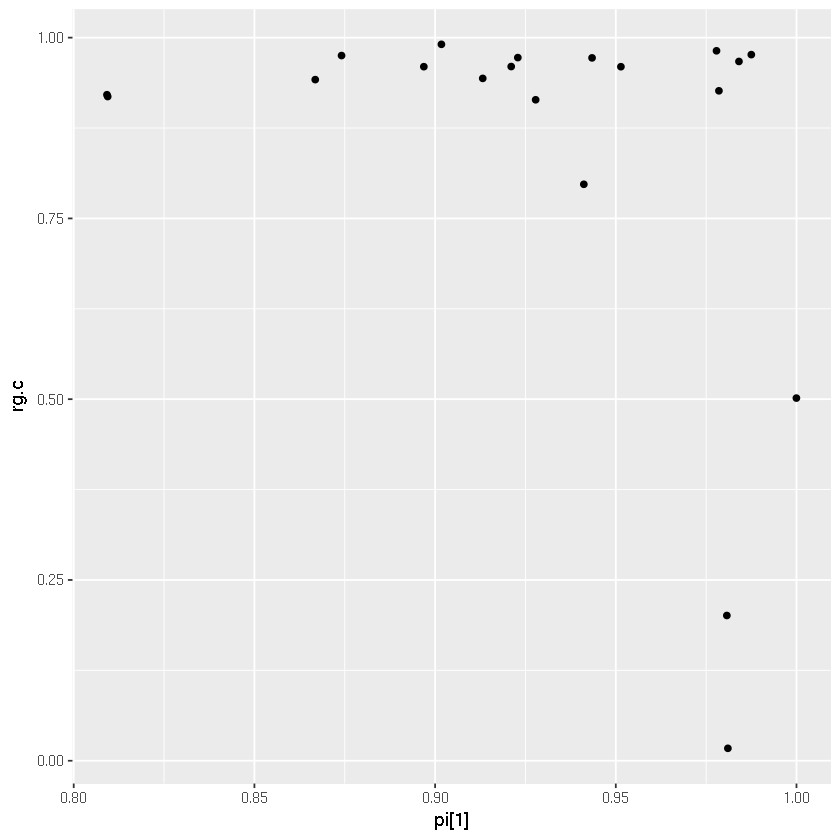

In [22]:
ggplot(m1_filt, aes(x=`pi[1]`, y=`rg.c`))+geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


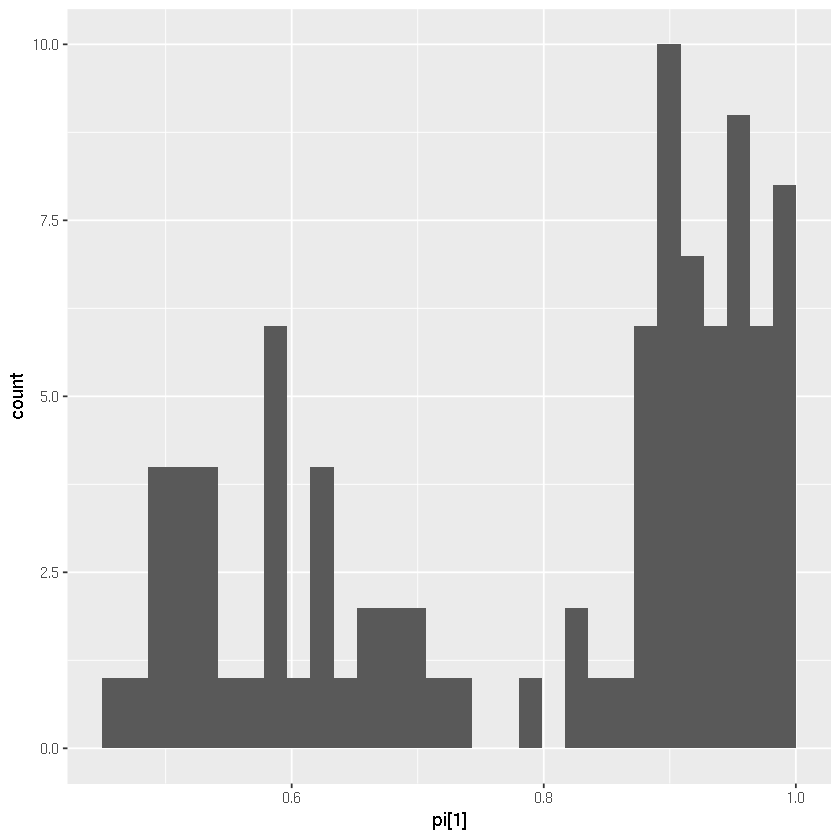

In [91]:
ggplot(m1_filt, aes(x=`pi[1]`))+geom_histogram()

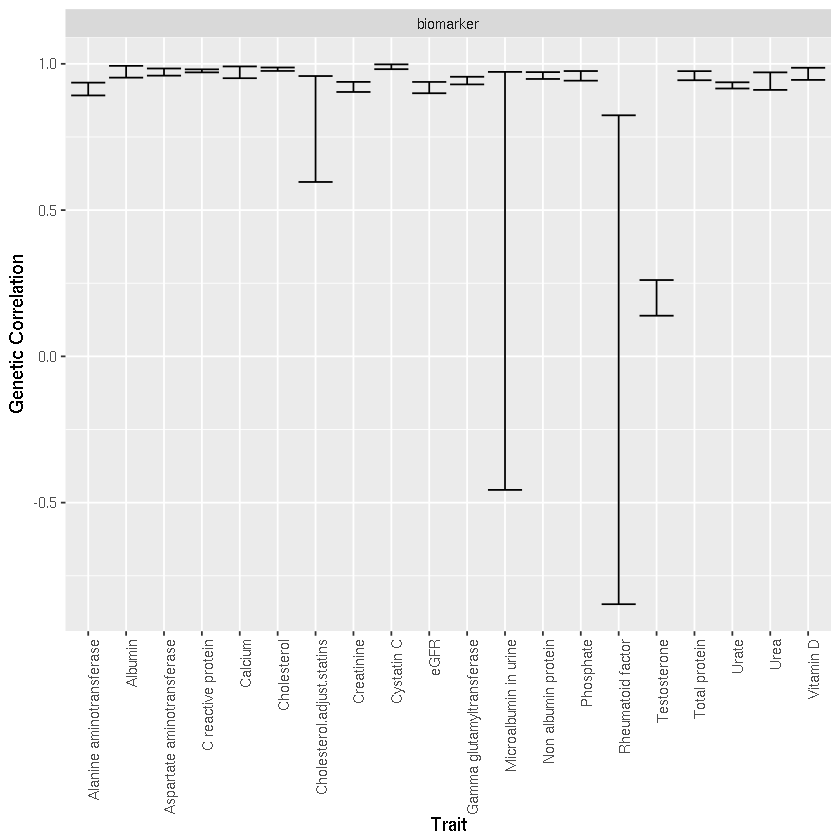

In [23]:
# plot the pis
# plot the genetic correlations

m1_filt <- m1_filt %>% mutate(variable_name=str_replace_all(variable_name, "_", " "))
ggplot(m1_filt, aes(x=variable_name, y=rg.c))+geom_errorbar(aes(ymin=rg.l, ymax=rg.u)) + 
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Genetic Correlation")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

variable_name
Alanine aminotransferase
Albumin
Aspartate aminotransferase
C reactive protein
Calcium
Cholesterol.adjust.statins
Cholesterol
Creatinine
Cystatin C
eGFR


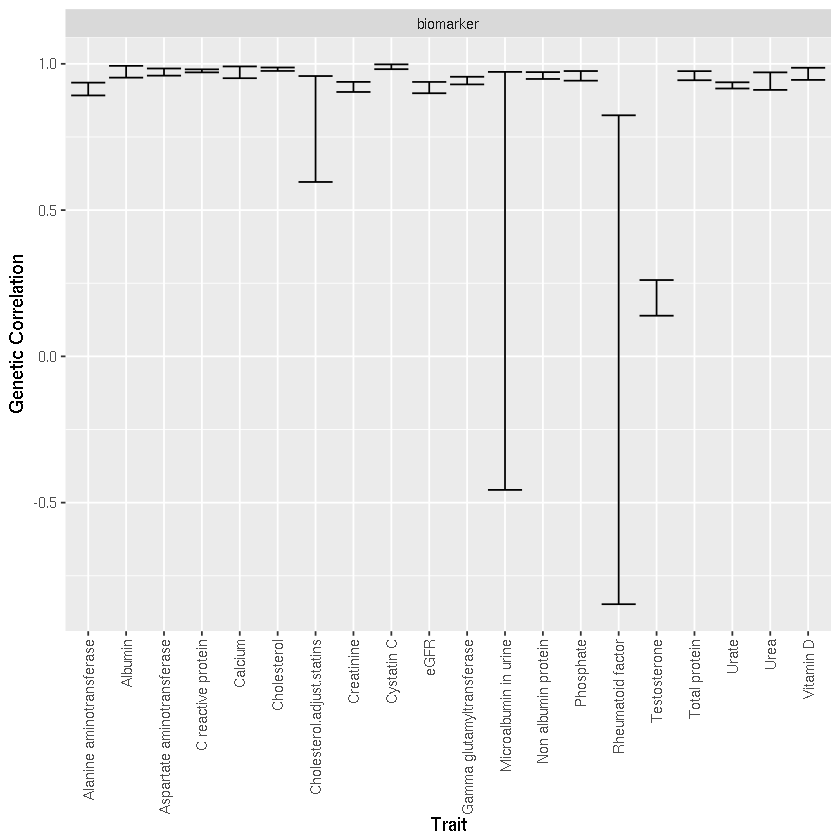

In [24]:
filter(m1_filt, category=="biomarker") %>% select(variable_name) %>% unique() 
ggplot(filter(m1_filt, category=="biomarker"), aes(x=variable_name, y=rg.c))+geom_errorbar(aes(ymin=rg.l, ymax=rg.u)) + 
theme(axis.text.x=element_text(angle=90,hjust=1,  vjust=0.5)) +ylab("Genetic Correlation")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

In [25]:
m1_full2 <- m1_filt %>% select(variable_name, category, c('hf.c','hm.c', 'hf.l', 'hf.u' ,'hm.l' ,'hm.u')) %>% 
gather(key="h_type", value="val", -variable_name, -category) 
m1_full2$sex <-sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[1]])
m1_full2$int <- sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[2]])
m1_full3 <- m1_full2 %>% select(-h_type) %>% unique() %>% filter(!is.na(val)) %>% mutate(val=as.numeric(val)) 


In [26]:

m1_full4 <- dcast(m1_full3, variable_name + category + sex ~ int, value.var="val", fun.aggregate = min, na.rm = TRUE)

Warning message in .fun(.value[0], ...):
“no non-missing arguments to min; returning Inf”Warning message in .fun(.value[i], ...):
“no non-missing arguments to min; returning Inf”Warning message in .fun(.value[i], ...):
“no non-missing arguments to min; returning Inf”Warning message in .fun(.value[i], ...):
“no non-missing arguments to min; returning Inf”Warning message in .fun(.value[i], ...):
“no non-missing arguments to min; returning Inf”

In [27]:
herit_df <- m1_full4 %>% rename(mid=c, low=l, up=u)  %>% 
mutate(sex=ifelse(sex=="hf", "female", ifelse(sex=="hm", "male", NA))) %>%
mutate(variable_name=str_replace_all(variable_name, "_", " "))

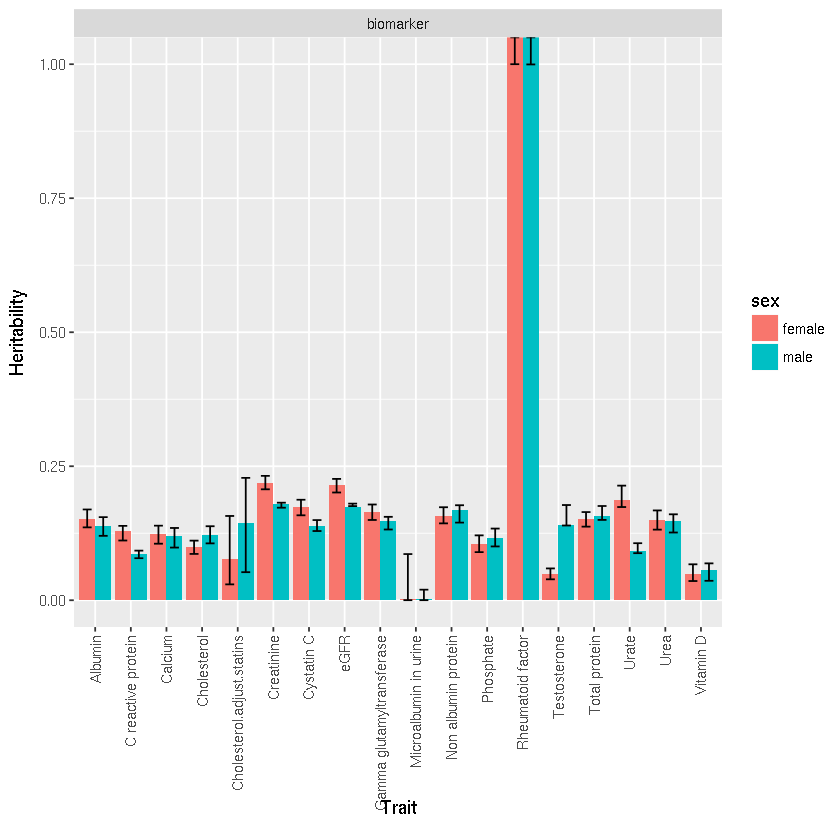

In [28]:
ggplot(filter(herit_df, category=="biomarker"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5),
     axis.title.x = element_text(margin = margin(t = 0, r = 0, b = 10, l = 0))) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

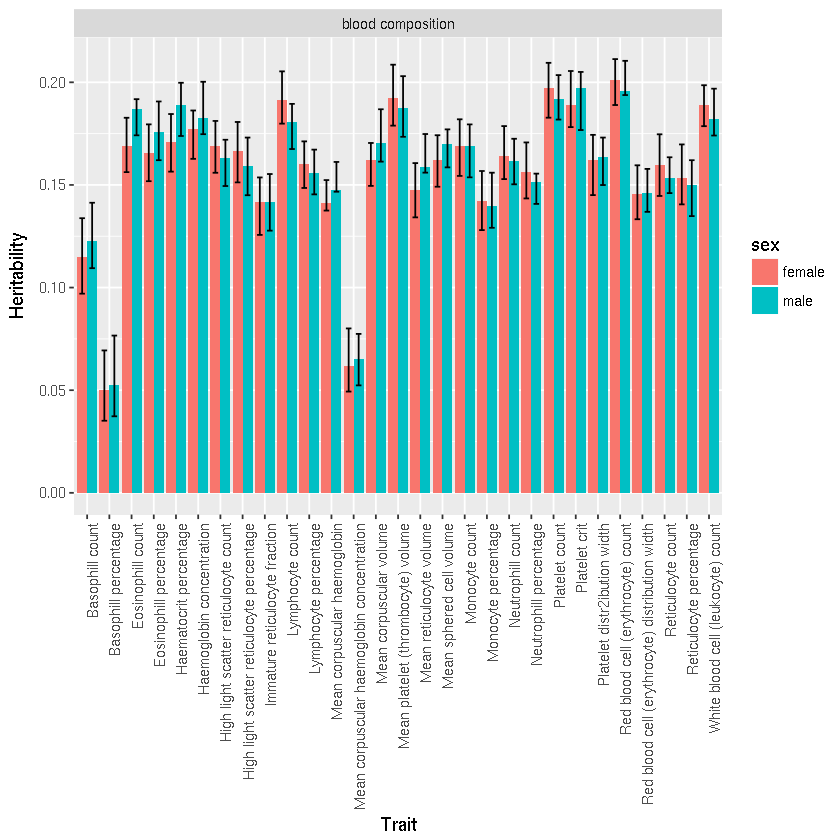

In [98]:
ggplot(filter(herit_df, category=="blood composition"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=1)) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

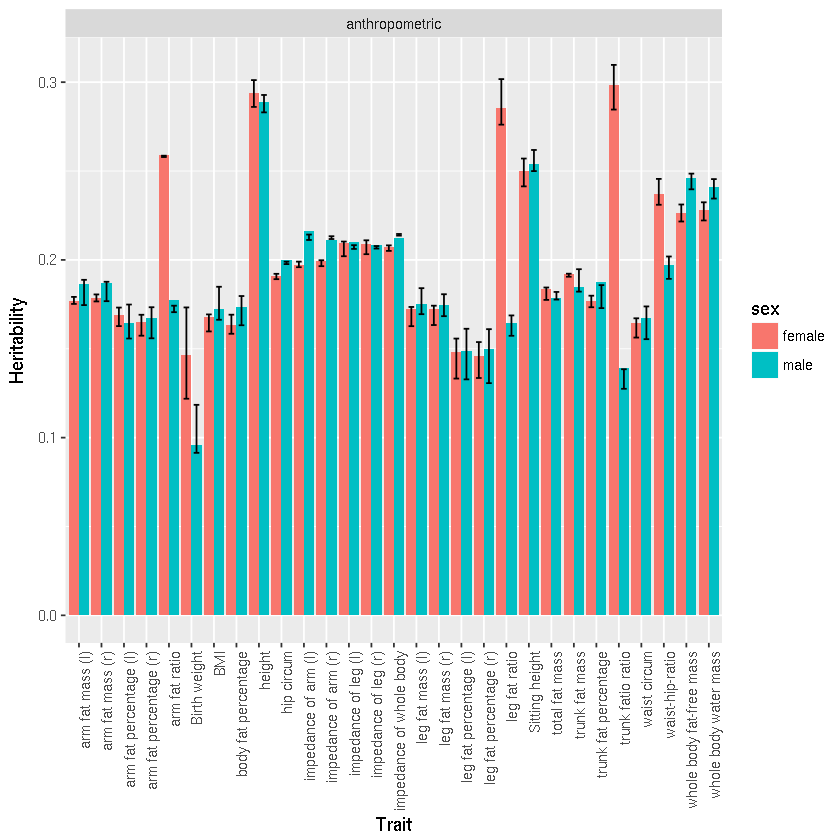

In [99]:
ggplot(filter(herit_df, category=="anthropometric"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

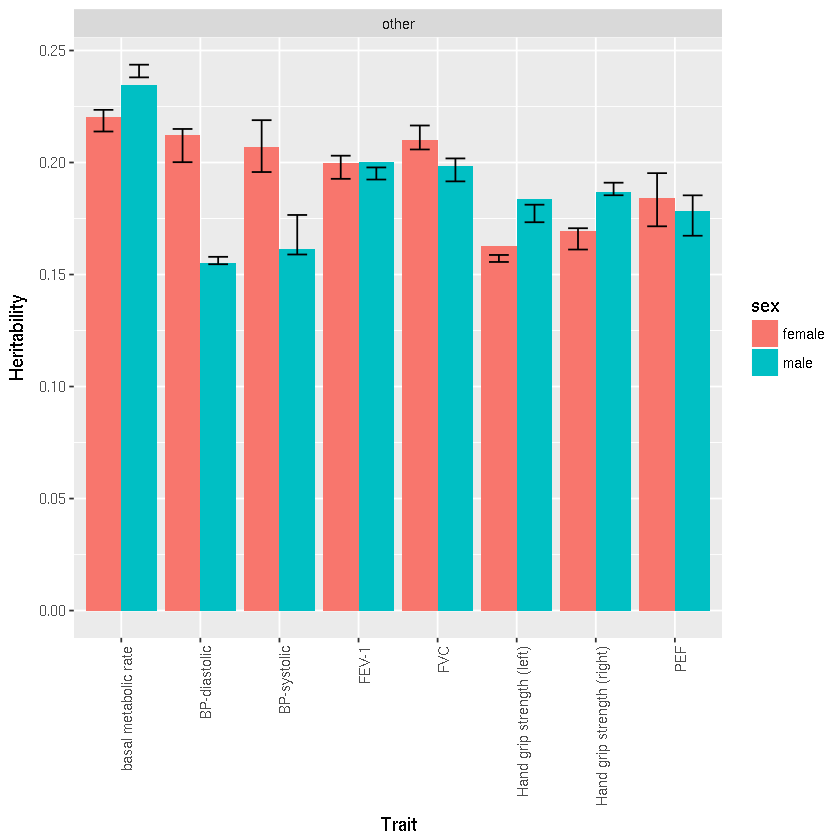

In [100]:
ggplot(filter(herit_df, category=="other"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

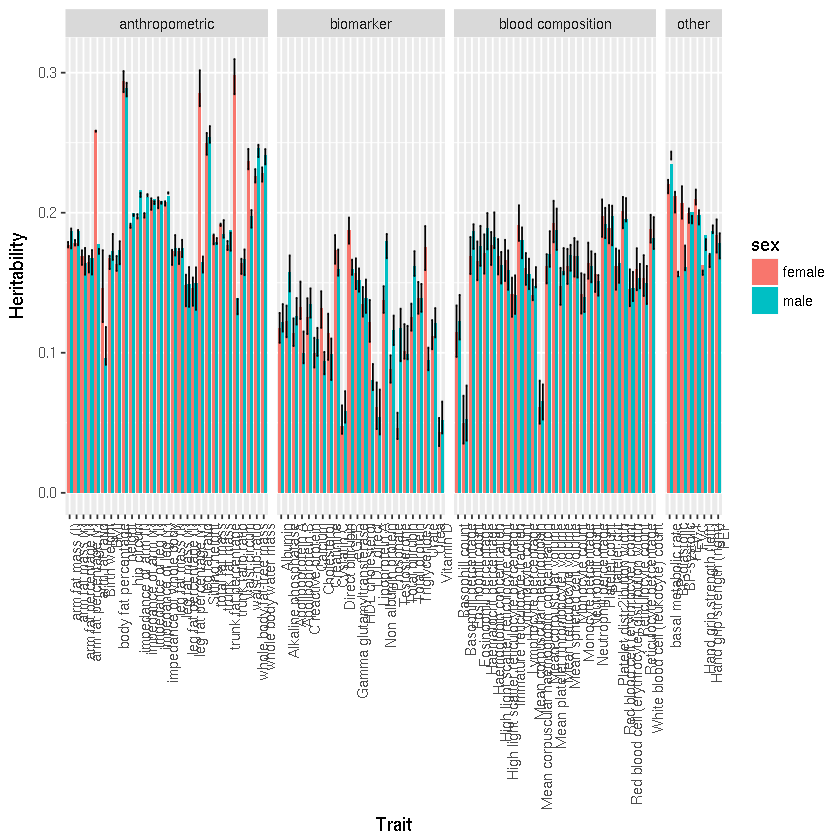

In [101]:
# plot the heritability

ggplot(herit_df, aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1)) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")


In [102]:
# what is missing? what are we suspicious of?

# find all the ones with weird h.f / r.g confidence intervals
#   what is going on here?

